Text(value='', description='Location:', placeholder='Enter a city or location')

Button(description='Get Weather', style=ButtonStyle())

{'location': {'name': 'Tokyo', 'region': 'Tokyo', 'country': 'Japan', 'lat': 35.69, 'lon': 139.69, 'tz_id': 'Asia/Tokyo', 'localtime_epoch': 1724533591, 'localtime': '2024-08-25 06:06'}, 'current': {'last_updated_epoch': 1724533200, 'last_updated': '2024-08-25 06:00', 'temp_c': 28.3, 'temp_f': 82.9, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 11.9, 'wind_kph': 19.1, 'wind_degree': 180, 'wind_dir': 'S', 'pressure_mb': 1011.0, 'pressure_in': 29.85, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 94, 'cloud': 75, 'feelslike_c': 32.7, 'feelslike_f': 90.9, 'windchill_c': 27.1, 'windchill_f': 80.7, 'heatindex_c': 30.3, 'heatindex_f': 86.5, 'dewpoint_c': 23.0, 'dewpoint_f': 73.4, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 7.0, 'gust_mph': 16.3, 'gust_kph': 26.3}}

Weather in Tokyo:
Temperature: 28.3°C
Humidity: 94%
Wind Speed: 19.1 kph


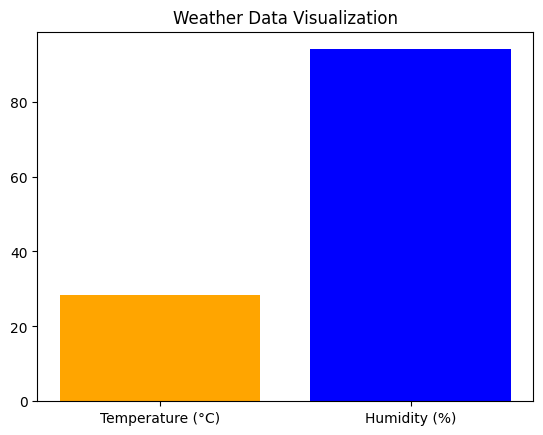

In [9]:

!pip install requests
!pip install ipywidgets
!pip install matplotlib


import requests
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


api_key = 'd46707edb41145c9816205649242408'


def get_current_weather(location, api_key):

    base_url = "http://api.weatherapi.com/v1/current.json"


    complete_url = f"{base_url}?key={api_key}&q={location}"

    response = requests.get(complete_url)

    return response.json()


def display_weather_info(weather_data):

    print(weather_data)


    if 'error' not in weather_data:

        location = weather_data['location']['name']
        temp = weather_data['current']['temp_c']
        humidity = weather_data['current']['humidity']
        wind_speed = weather_data['current']['wind_kph']


        print(f"\nWeather in {location}:")
        print(f"Temperature: {temp}°C")
        print(f"Humidity: {humidity}%")
        print(f"Wind Speed: {wind_speed} kph")

        return temp, humidity, wind_speed
    else:

        print(f"Error: {weather_data['error']['message']}")
        return None, None, None

def plot_weather_data(temp, humidity):
    if temp is not None and humidity is not None:
        labels = ['Temperature (°C)', 'Humidity (%)']
        values = [temp, humidity]

        fig, ax = plt.subplots()
        ax.bar(labels, values, color=['orange', 'blue'])
        ax.set_title('Weather Data Visualization')
        plt.show()


location_input = widgets.Text(
    value='',
    placeholder='Enter a city or location',
    description='Location:',
    disabled=False
)

search_button = widgets.Button(description="Get Weather")


def on_button_click(b):
    location = location_input.value
    weather_data = get_current_weather(location, api_key)
    temp, humidity, wind_speed = display_weather_info(weather_data)


    if temp is not None and humidity is not None:
        plot_weather_data(temp, humidity)


search_button.on_click(on_button_click)

display(location_input, search_button)
